In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
plt.style.use("ggplot")

# Classification

## K-NN

And few pros and cons about KNN.

Pros:

Non-parametric: Makes no assumptions about data distribution, useful in real world application
Simple algorithm to explain and understand
It can be uses for both classification and regression

Cons:

Computationally expensive, because the algorithm stores all of the training data
High memory requirement, again, it stores all of the training data
Prediction stage might be slow (with big N)

### Iris Dataset

In [107]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [108]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)

In [109]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [110]:
pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

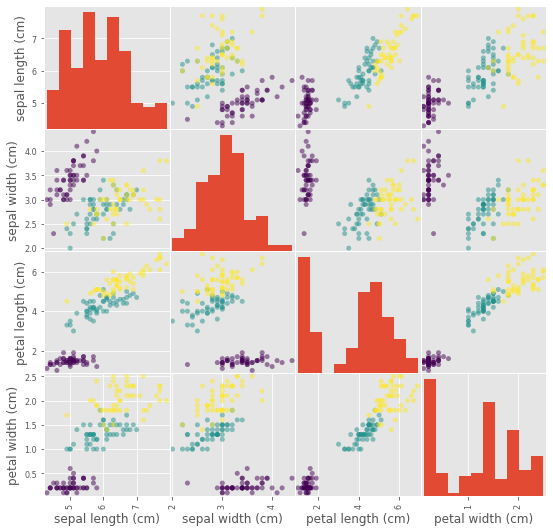

In [111]:
pd.plotting.scatter_matrix(df, c=y, figsize=[9,9], s=100)
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df, y)

KNeighborsClassifier(n_neighbors=3)

In [113]:
X_new = np.array([
    [5.6, 2.8, 3.9, 1.1],
    [5.7, 2.6, 3.8, 1.3],
    [4.7, 3.2, 1.3, 0.2]
])

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: [1 1 0]


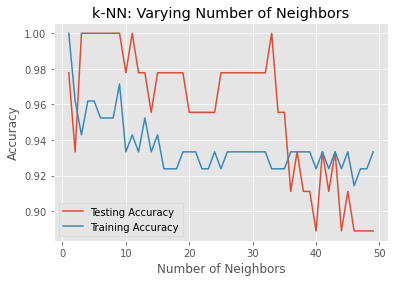

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Best test accuracy for K between 3 and 9
# Smaller K: mode complex model -> tendency to overfit
# Larger K: simpler model -> tendency to underfit

In [115]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=0, stratify=y)

param_grid = {"n_neighbors" : np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("Best estimator:", knn_cv.best_estimator_)
print("Best score:", knn_cv.best_score_)


Best estimator: KNeighborsClassifier(n_neighbors=17)
Best score: 0.9557312252964426


### Digits Dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

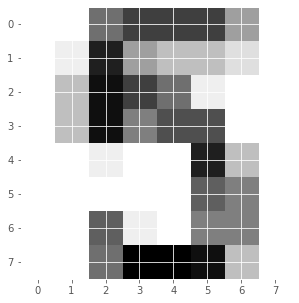

In [116]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
fig = plt.figure(figsize=(5, 5))
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [117]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n",  classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333
Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 32  0]
 [ 0  0  0  0  1  0  0  0  1 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

 

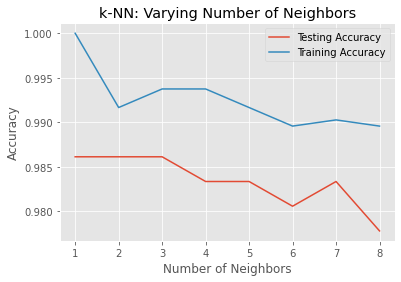

In [118]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


# Regression

In [119]:
bc = pd.read_csv("datasets/boston_crime.csv")
bc.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [120]:
bc.shape

(506, 14)

In [121]:
bc.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


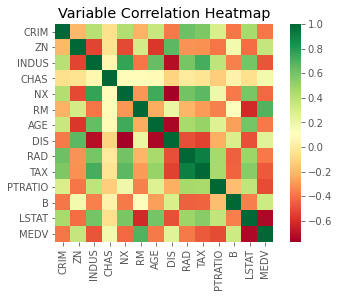

In [122]:
sns.heatmap(bc.corr(), square=True, cmap='RdYlGn')
plt.title("Variable Correlation Heatmap")
plt.show()

In [123]:
y = bc.MEDV.values
X = bc.drop("MEDV", axis=1).values

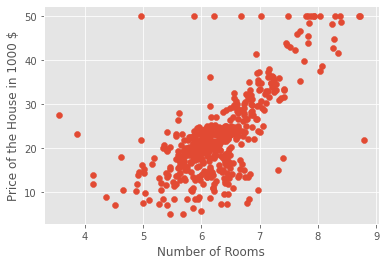

In [124]:
X_rooms = X[:,5]
plt.scatter(X_rooms, y)
plt.xlabel("Number of Rooms")
plt.ylabel("Price of the House in 1000 $")
plt.show()

In [125]:
# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X_rooms.shape)

# Reshape X and y
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y.shape)
print("Dimensions of X after reshaping: ", X_rooms.shape)

Dimensions of y before reshaping:  (506,)
Dimensions of X before reshaping:  (506,)
Dimensions of y after reshaping:  (506, 1)
Dimensions of X after reshaping:  (506, 1)


Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis. E.g,
If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

R^2 Score: 0.48352545599133423
Average 5-Fold CV Score: -0.029521919957810637


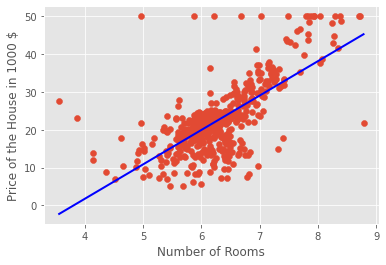

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(X_rooms, y)
print("R^2 Score:", reg.score(X_rooms, y))

cv_scores = cross_val_score(reg, X_rooms, y, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cv_scores)}")

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)


plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color="b", linewidth=2)
plt.xlabel("Number of Rooms")
plt.ylabel("Price of the House in 1000 $")
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = bc.MEDV
X = bc.drop(columns=["MEDV"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
print(f"R^2: {reg_all.score(X_train, y_train)}")

y_pred = reg_all.predict(X_test)
print(f"R^2: {reg_all.score(X_test, y_test)}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

R^2: 0.7645451026942549
R^2: 0.6733825506400172
Root Mean Squared Error: 5.214975145375422


## Regularization

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

### Ridge Regression

Also called L2 Regularization, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

In [128]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

print(f"R^2: {ridge.score(X_train, y_train)}")
print(f"R^2: {ridge.score(X_test, y_test)}")

R^2: 0.7570763626044671
R^2: 0.6550662530677256


Text(0, 0.5, 'Accuracy')

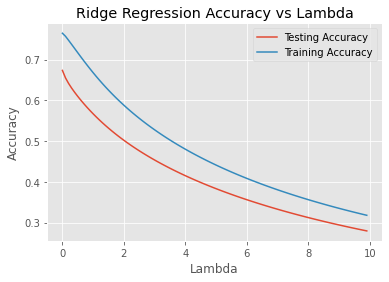

In [129]:
# Setup arrays to store train and test accuracies
alpha = np.arange(0, 10, 0.1)
train_accuracy = np.empty(len(alpha))
test_accuracy = np.empty(len(alpha))

# Loop over different values of k
for i, a in enumerate(alpha):
    # Setup a k-NN Classifier with k neighbors: knn
    ridge = Ridge(alpha=a, normalize=True)

    # Fit the classifier to the training data
    ridge.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = ridge.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = ridge.score(X_test, y_test)

# Generate plot
plt.title('Ridge Regression Accuracy vs Lambda')
plt.plot(alpha, test_accuracy, label = 'Testing Accuracy')
plt.plot(alpha, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Accuracy')

### Lasso Regression

Also called L1 Regularization, adds the “absolute magnitude” of the coefficient as the penalty term to the loss function.

L1 can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. 

In [130]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

print(f"R^2: {lasso.score(X_train, y_train)}")
print(f"R^2: {lasso.score(X_test, y_test)}")

R^2: 0.6441768766861627
R^2: 0.5739592618269079


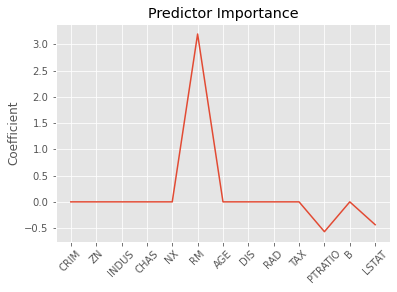

In [131]:
names = X_train.columns
lasso_coef = lasso.fit(X_train, y_train).coef_
plt.plot(names, lasso_coef)
plt.title("Predictor Importance")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Accuracy')

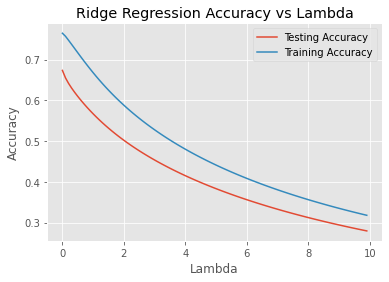

In [132]:
# Setup arrays to store train and test accuracies
alpha = np.arange(0, 10, 0.1)
train_accuracy = np.empty(len(alpha))
test_accuracy = np.empty(len(alpha))

# Loop over different values of k
for i, a in enumerate(alpha):
    # Setup a k-NN Classifier with k neighbors: knn
    lasso = Ridge(alpha=a, normalize=True)

    # Fit the classifier to the training data
    lasso.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = lasso.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = lasso.score(X_test, y_test)

# Generate plot
plt.title('Ridge Regression Accuracy vs Lambda')
plt.plot(alpha, test_accuracy, label = 'Testing Accuracy')
plt.plot(alpha, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Accuracy')

# Tree-based Models

- If-else questions about individual features.
- Non-parametric. Can capture non-linear relationships between features and labels.
- Don't require feature scaling, as they are not distance-based.
- Computational cost of prediction is logarithmic in the number of data points used to train the tree.

Disadvantages:

- Can easily lead to overfitting (high variance). Pruning, setting minimum number of samples required per leaf, and setting maximum depth of the tree are necessary to avoid overfitting.

- Can be unstable because small variations in the data might result in a completely different tree. Mitigated by using ensambles. 

- Predictions of decision trees are neither smooth nor continuous, but constant approximations. Therefore, they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be NP-complete. Consequently, practical decision trees are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. Mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- Create biased trees if some classes dominate. Mitigated by balancing the dataset prior to fitting with the decision tree.

## Decision Trees

Data-structure consisting of a hierarchy of individual units called nodes. A node is a point that involves either a question or a prediction. 3 types of nodes:

1. Root: top node
2. Internal node: node that has a parent. It also involves a question that gives rise to 2 children nodes. 
3. Leaf: node that has no children is called a leaf. Involves no quesitons, it's where a prediction is made.

A decision tree learns patterns from the features in such a way to produce the purest leafs.

The purity of a leaf is the homogeneity of its examples with regard to their classes, or how good is each variable at predicting the output.

### Classification Tree

1. Calculate purity of leaves. 

Methods to calculate purity:
    1. Gini Index (simplest, computationally inexpensive)
    2. Entropy
    3. Information Gain 

2. Order leaves from highest to lowest purity

In [133]:
iris = datasets.load_iris()
type(iris)
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)

dt = DecisionTreeClassifier(criterion="gini", max_depth=6, min_samples_leaf=2, random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", dt.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))
print("Classification Report:\n",  classification_report(y_pred, y_test))

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



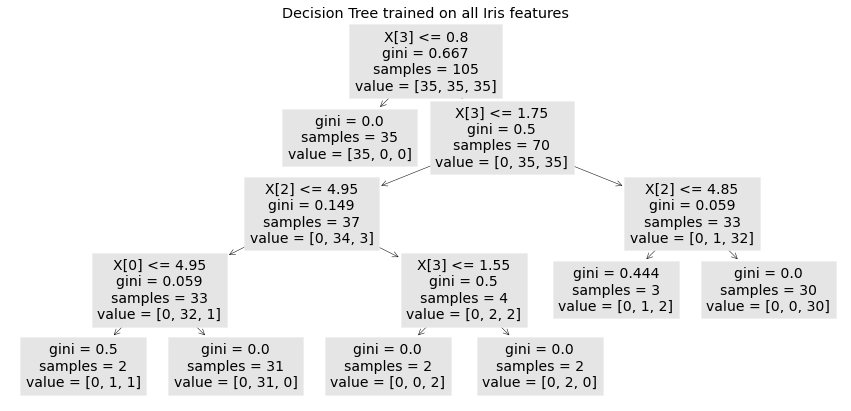

In [135]:
plt.figure(figsize=(15, 7))
plot_tree(dt)
plt.title("Decision Tree trained on all Iris features")
plt.show()

Information Gain (IG):

Gini Index:

Entropy:

### Regression Tree

In [136]:
bc = pd.read_csv("datasets/boston_crime.csv")
display(bc.head())
y = bc.MEDV.values
X = bc.drop("MEDV", axis=1).values

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeRegressor(max_depth=7, min_samples_leaf=0.03, random_state=0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(f"MSE: {MSE(y_pred, y_test)}")
rmse = np.sqrt(MSE(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"R^2: {dt.score(X_test, y_test)}")

MSE: 3.0956165186255213
RMSE: 4.723223937975088
R^2: 0.7320757825558477


#### Cost Complexity Pruning

Decision trees are notorious for being overfit to the training data. 

max_depth and min_samples_leaf are designed to reduce overfitting. 

Cost complexity pruning can simplify the process by finding the smallest tree that improves the accuracy of the testing dataset. 

Introduces a penalty regulated by the alpha parameter.

Tree score = SSR + alpha*T, where T = total number of leaves

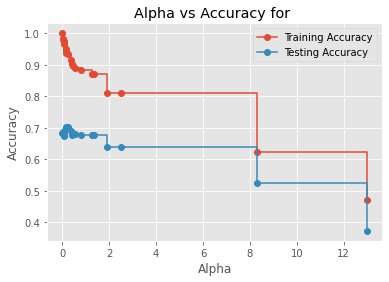

In [138]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.title('Alpha vs Accuracy for ')
plt.plot(ccp_alphas, train_scores, label = 'Training Accuracy', marker="o", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, label = 'Testing Accuracy', marker="o", drawstyle="steps-post")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.show()

Cost complex doesn't seem to help, but alpha is actually sensitive to the datasets, so we should use cross validation to find the best value for alpha.

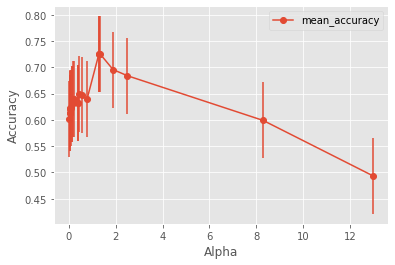

In [139]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(test_scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=["alpha", "mean_accuracy", "std"])

alpha_results.plot(x="alpha", y="mean_accuracy", yerr="std", marker="o")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.show()

Nice! Using cross-validation we can see that the ideal value for alpha is around 1.6 to 1.7

Let's use GridSearchCV:

In [141]:
from sklearn.model_selection import GridSearchCV

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

param_grid = {'ccp_alpha': ccp_alphas}
dt_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5, verbose=0)
dt_grid.fit(X_train, y_train)

print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
print("Train Score: ", dt_grid.best_score_)

{'ccp_alpha': 1.6156522031556584}
DecisionTreeRegressor(ccp_alpha=1.6156522031556584)
Train Score:  0.7155353978742112


GridSearchCV confirms the previous findings!

## Ensemble Learning

- Train different models on the same dataset
- Let each model make its prediction and aggregate predictions of individual models, where each prediction represents a vote of a final meta-model.
- Final prediction is more robust, accurate. 

In [16]:
iris = datasets.load_iris()
type(iris)
X_test = iris.data
y = iris.target
X = pd.DataFrame(x, columns=iris.feature_names)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

ct = DecisionTreeClassifier()
lr = LogisticRegression(random_state=SEED, max_iter=100)
knn = KNN(n_neighbors=4)
estimators = [("Classification Tree", ct), ("Logistic Regression", lr), ("KNN Classifier", knn)]

for clf_name, clf in estimators:    
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    print(f"{clf_name} : {accuracy}")


vc = VotingClassifier(estimators=estimators, voting="hard")
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f"Voting Classifier: {accuracy_score(y_test, y_pred)}")


Classification Tree : 0.9777777777777777
Logistic Regression : 0.9777777777777777
KNN Classifier : 0.9777777777777777
Voting Classifier: 0.9777777777777777


### Bagging (bootsrap aggregator)

- Ensamble made from models of the same algorithm (can be any algorithm)
1. Create bootsrap datasets (randomly selects samples with replacements until it has the same shape as the train set. On average, 63% of the samples are seen by the model. The remaining 37% are the out of bag samples).
2. Create an estimator for each bootsrap dataset. For further randomization, you can use a random subset of variables (Random Forest)
3. Run train set through all the trees and record the predictions. The final prediction of the ensamble is the majority vote (classifier) or the average of all predicitons (regressor). 
4. Measure the accuracy of the ensemble with a test set, or by the proportion of out-of-bag samples that are correcty classified by the ensemble (out-of-bag evaluation).

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

ct = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, random_state=SEED)
bc = BaggingClassifier(base_estimator=ct, n_estimators=300, n_jobs=1)
bc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f"Bagging Classifier: {accuracy_score(y_test, y_pred)}")

Bagging Classifier: 0.9777777777777777


Out-of-bag classifier: unseen data without using cross-validation

In [36]:
bc = BaggingClassifier(base_estimator=ct, n_estimators=300, n_jobs=1, oob_score=True)
bc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f"Bagging Classifier accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Out-of-bag accuracy: {bc.oob_score_}")

Bagging Classifier accuracy: 0.9777777777777777
Out-of-bag accuracy: 0.9333333333333333


### Random Forest

- Bagging ensemble with decision tree as base estimator
- RF introduces further randomization because each decision tree is trained using a subset of features selected randomly without replacement



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=50, max_depth=4, min_samples_leaf=0.1, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Random Forest: {accuracy_score(y_test, y_pred)}")

Random Forest: 0.9777777777777777


#### Feature Importance: 
- How much the tree nodes use a feature (weighted average) to reduce impurity
- Because decision trees are trained using a subset of features, the feature importance can be estimated!



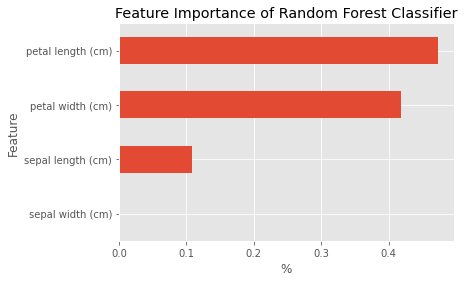

In [51]:
rf_fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
rf_fi.plot(kind="barh")
plt.xlabel("%")
plt.ylabel("Feature")
plt.title("Feature Importance of Random Forest Classifier")
plt.show()

### Boosting

- Ensemble of predictors trained sequentially
- Each predictor tries to correct its predecessor



### AdaBoost

1. Tree size
- RF: Full sized tree. Some trees larger than others.
- AB: trees are usually stumps (1 node and 2 leaves). Only looks at 1 variable to make a decision (weak learner)

2. Voting weights
- RF: each tree has one vote with equal weight.
- AB: some stumps have more weight than others. (each predictor is assinged a coefficient alpha)

3. Tree order
- RF: trees are made independent of one another (parallel learners)
- AB: order is important, each stump takes previous stumps mistakes into account. (sequential learners)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ct = DecisionTreeClassifier(max_depth=1, random_state=SEED)
ab = AdaBoostClassifier(base_estimator=ct, n_estimators=200) # no need to enter a base_estimator

ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
print(f"AdaBoost: {accuracy_score(y_test, y_pred)}")


AdaBoost: 0.9111111111111111


Boosting technique learns progressively, it is important to ensure that you have quality data. AdaBoost is also extremely sensitive to Noisy data and outliers so if you do plan to use AdaBoost then it is highly recommended to eliminate them. Else it can lead to overfitting!